# Analyse exploratoire et ACP

## 1. Intérêt de l'analyse exploratoire
Il s'agit de d'analyser les données sur plusieurs dimensions, et non une par une.

Exemple avec un échantillon décrit par 2 variables :

In [1]:
# Import packages
library("ggplot2")
library("gridExtra")

In [2]:
# Pour graphiques
fig <- function(width, height){
    options(repr.plot.width = width,
            repr.plot.height = height)
}

no_axes_titles <- theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank())

theme_format <- theme(plot.title=element_text(size=20, hjust=0.5)) +
    theme(axis.text.x = element_text(size=15), axis.text.y = element_text(size=15))

In [3]:
# Echantillon de données à 2 variables
x1 <- rnorm(200, -2, 0.5)
x2 <- rnorm(200, 2, 0.8)
x <- c(x1, x2)
y <- rnorm(400, 0, 2)
z <- data.frame(x,y)
m <- matrix(c(1,1,-1,1), ncol=2, nrow=2)
z <- as.data.frame(data.matrix(z) %*% m)
colnames(z) <- c("x", "y")

### Analyse des variables séparées

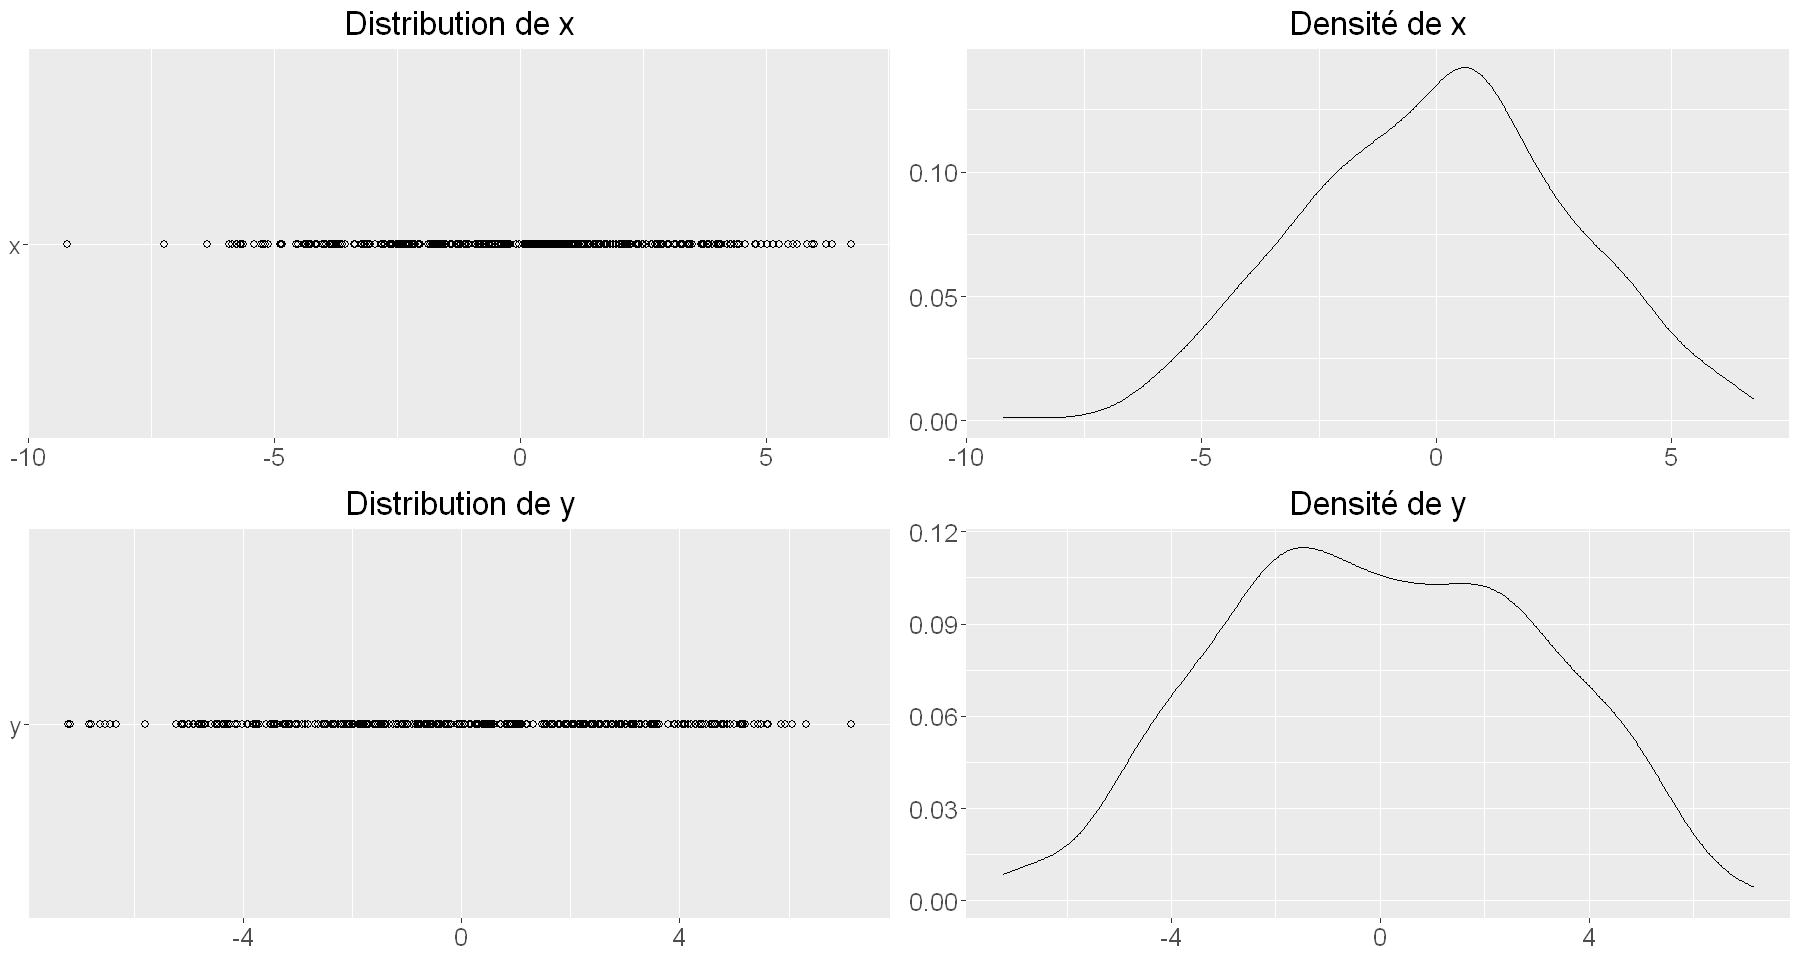

In [4]:
# Analyse des variables séparémment
fig(15, 8)

g1 <- ggplot(z) + geom_point(aes(x=x, y="x"),shape=1,  size=2) + 
    no_axes_titles + ggtitle("Distribution de x") +
    theme_format

g2 <- ggplot(z, aes(x=x)) + geom_density() +
    no_axes_titles + ggtitle("Densité de x") +
    theme_format

g3 <- ggplot(z) + geom_point(aes(x=y, y="y"),shape=1,  size=2) + 
    no_axes_titles + ggtitle("Distribution de y") +
    theme_format

g4 <- ggplot(z, aes(x=y)) + geom_density() +
    no_axes_titles + ggtitle("Densité de y") +
    theme_format

grid.arrange(g1, g2, g3, g4, nrow=2) 

La distribution de chaque variable ne fait pas apparaitre de structure particulière.

### Structure des données
Pour l'exemple, on s'est limité à un jeu de données avec 2 variables pour que la structure initiale puisse être visualisée avec un nuage de points.

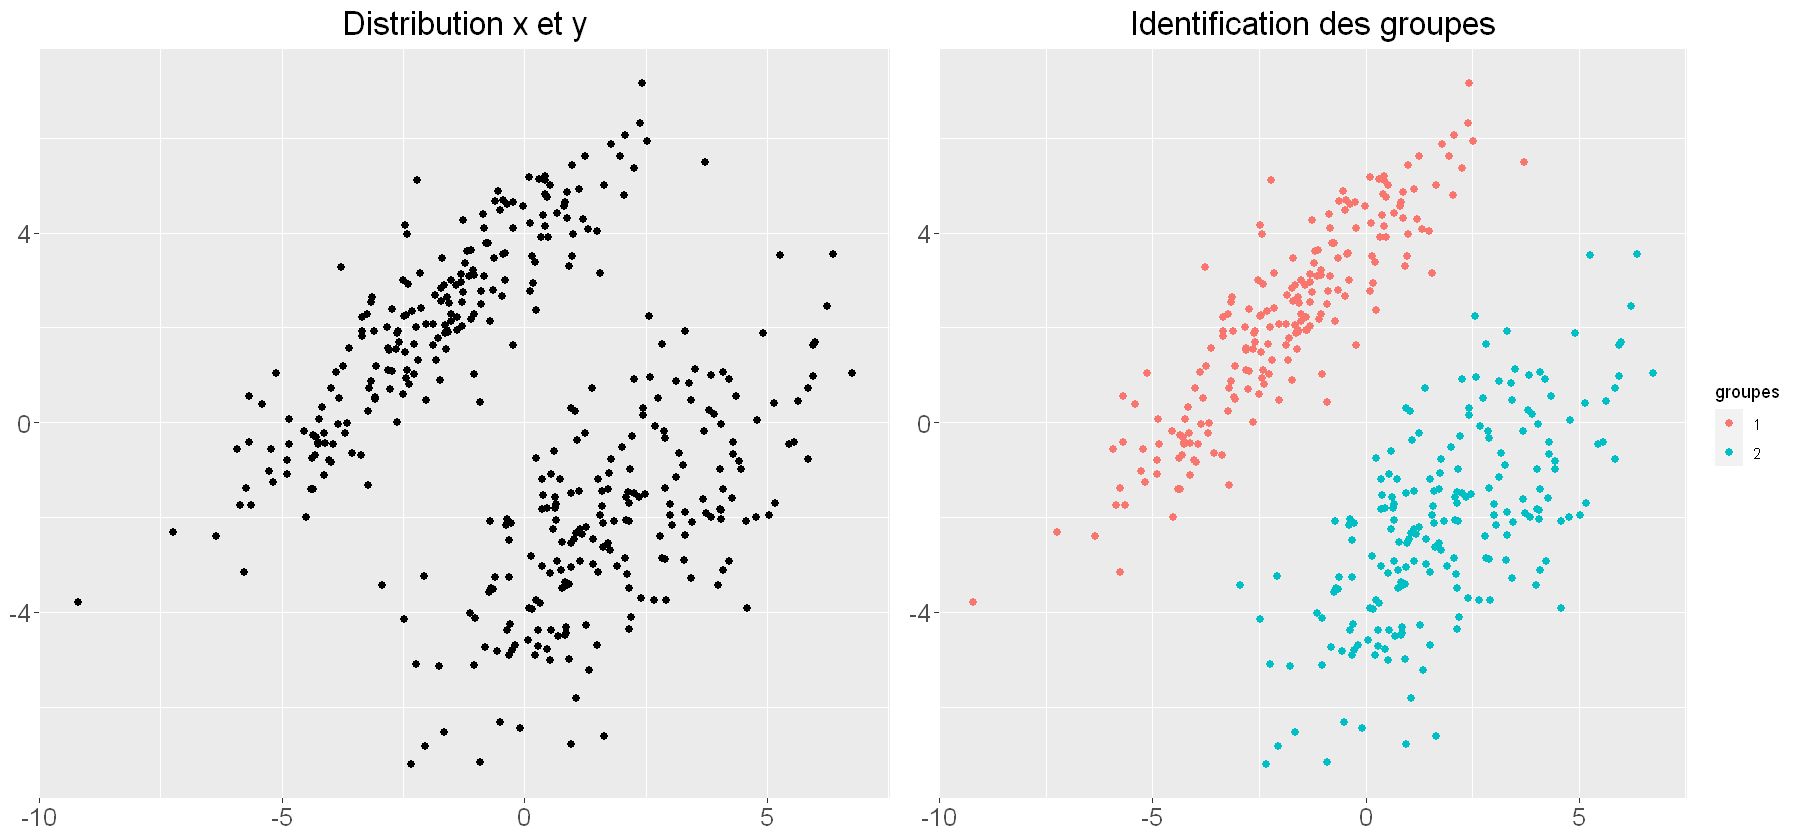

In [5]:
fig(15,7)
g1 <- ggplot(z, aes(x=x, y=y)) + geom_point(size=2) +
    no_axes_titles + ggtitle("Distribution x et y") +
    theme_format

groupes <- as.factor(rep(c(1, 2), each=200))
z$groupes <- groupes

g2 <- ggplot(z, aes(x=x, y=y, color=groupes)) + geom_point(size=2) +
    no_axes_titles + ggtitle("Identification des groupes") +
    theme_format

grid.arrange(g1, g2, nrow=1) 

Les données se structure en deux groupes. Cette structure n'apparait ici qu'en visualisant l'ensemble des variables.

## 2. Utilisation de l'analyse en composantes principales
Afin de visualiser la structure globale de données avec plusieurs variables, nous pouvons utiliser l'ACP.

Il s'agit d'une projection des données sur de nouveaux axes (nouvelles variables crées par l'ACP), avec pour objectif de faire apparaitre la structure globale des données sur les premiers axes, afin d'être visualisée en 1 ou 2 dimensions (limites d'un graphique).

Exemple avec acp sur les données précédentes :

In [6]:
library(FactoMineR)
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [7]:
#suppression colonne pays
base <- z[,-3]

In [8]:
# Calcul PCA avec centrage-réduction
res.pca <- PCA(base, scale.unit=TRUE, graph = FALSE, ncp=Inf)

In [9]:
# Data frame des données projetées
newz <- as.data.frame(res.pca$ind$coord)
colnames(newz) <- c("axe1", "axe2")

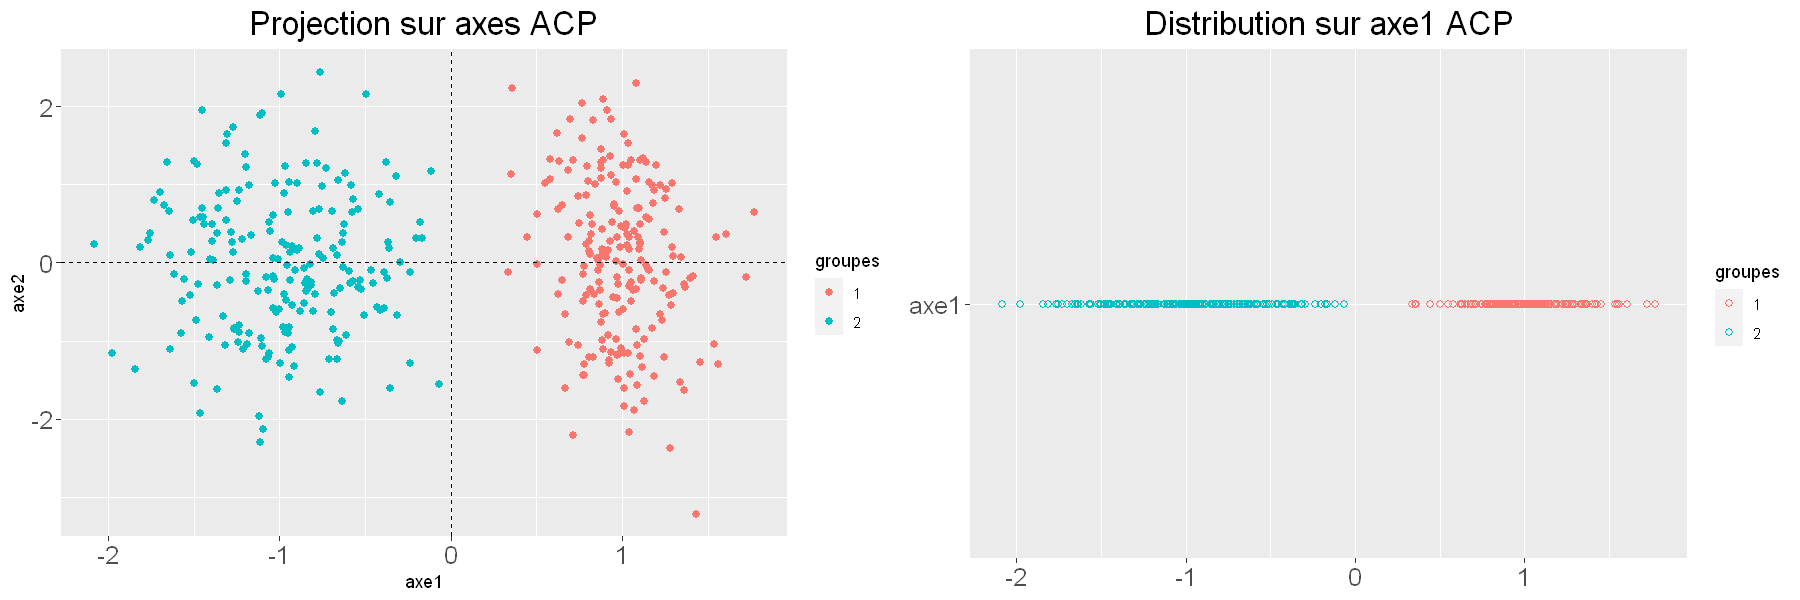

In [10]:
fig(15, 5)

g1 <- ggplot(newz, aes(x=axe1, y=axe2, color=groupes)) + geom_point(size=2) +
    ggtitle("Projection sur axes ACP") +
    theme_format +
    geom_hline(yintercept=0, linetype="dashed", size=0.5, color="black") + 
    geom_vline(xintercept=0, linetype="dashed", size=0.5, color="black")

g2 <- ggplot(newz) + geom_point(aes(x=axe1, y="axe1", color=groupes),shape=1,  size=2) + 
    no_axes_titles + ggtitle("Distribution sur axe1 ACP") +
    theme_format

grid.arrange(g1, g2, nrow=1) 

Avec l'ACP, la structure des groupes apparait maintenant avec 1 variable.

### Compréhension de l'ACP
En écrivant les données sous forme de matrices, on a :
- $X$ matrice de données initiales : $n$ observations et $p$ variables
- $W$ représentation de l'espace de projection avec : $p$ variables initiales définit  par $k$ nouvelles variables
- $H$ Nouvelle matrice de données selon les nouvelles variables : $n$ observation et $k$ variables

*Note : $W$ pour weights matrix, et $H$ pour hidden matrix*

Avec ACP, $k=p$

On peut voir l'ACP comme :
- Une projection des données dans une nouvelle base : $\large{W^T X = H}$


- Une décomposition en factorisation de matrices : $\large{X = WH}$

La décomposition de matrices est une famille de modèles, souvent utilisée en réduction de dimensions ($k \lt p$)

lien sklearn : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

Les décompositions se font généralement avec des contraintes,  
pour l'ACP, les colonnes de $W$ sont orthogonales, et la variance de $H$ est maximisée sur les premiers axes.

### Objectif de l'ACP
L'ACP transforme la matrice initiale en 2 matrices, ce qui à première vue semble plus compliqué à analyser.  
Mais l'objectif est que les nouvelles variables créées par l'ACP, permettent de comprendre la structure avec peu d'entre elles (idéalement les 2 premières).

On passe donc de l'analyse d'une matrice $n \times p$, à l'analyse de deux matrices :
- $n \times 2$ (représentation des individus)
- et $p \times 2$ (représentation des variables / cercle des corrélations)

> ## <span style="color:red">Voir notebook 3 pour le cas pratique</span>

## 3. Limites de l'ACP
l'ACP est un modèle linéaire :
- Sensibilité aux outliers
- Difficulté sur les structures non linéaires

### Variante de l'ACP : l'ACP avec noyau
Pour les structures non linéaires, on peut utiliser une fonction $\phi$ qui va projeter les données dans un nouvel espace, où les données seront linéairement séparables, ce qui permettra d'utiliser l'ACP.  
Ce nouvel espace peut être de dimension supérieure, par rapport à l'initial.

Illustration :
<img src="data/kernel.png" width="500">

Le noyau (kernel) est la fonction qui permet de faire les calculs d'ACP dans le nouvel espace de description.


> ## <span style="color:red">Voir notebook 4 pour exemple</span>

## 5. Approches non linéaires
L'ACP est une méthode linéaire qui favorise la structure globale des données,  
Il existe aussi des méthodes non linéaires, qui sont adaptées pour des données de grande dimensions :
- Isomap : non linéaire et structure globale
- T-SNE (t-stochastic neighbour embedding) : non linéaire et structure locale

lien sklearn : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold

> ## <span style="color:red">Voir notebook 5 pour exemple</span>

## 5. Réduction de dimensions et machine learning
Dans le cadre du machine learning (modélisation sur des données de grandes dimensions),<br>
la réduction de dimensions (variables) permet :
- la visualisation des données
- la réduction des coûts (mémoire, calculs)
- d'améliorer les modèles en réduisant leur complexité, en ne gardant pas les variables non pertinentes
- de réduire le volume de données nécessaire à l'apprentissage du modèle (plus il y a de variables, plus il faut de données d'apprentissage)

Note: le clustering (classification non supervisée) est une réduction de dimensions au niveau des individus

#### ACP et CAH dans les étapes d'une modélisation :

<img src="data/steps.png">